<strong>Brian Ramirez</strong>

# Multiple Regression for Predictive Modeling

# Part I: Research Question
## A. Describe the purpose of this data analysis by doing the following:

### A1. Summarize <em>one</em> research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple regression.
<p>Which variables affect a patient's total charge?</p>

### A2. Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.
<p>The goal of the data analysis is to determine which variables, if any, have a significant affect on a patient's total charge at discharge.<br>
</p>

# Part II: Method Justification
## B. Describe multiple regression methods by doing the following:
### B1. Summarize the assumptions of a multiple regression model.
<p>The four primary assumptions of the multiple regression model involve linear relationship, multivariate normality, absence of multicollinearity, and homoscedasticity.</p>
<p>A linear relationship can be confirmed using a visual aid, such as a scatterplot diagram. Multivariate normality is the assumption of normally distributed residuals. The absence of multicollinearity can be tested using Variance Factor Values, which prove the independent variables "are not highly correlated with each other". Homoscedasticity assumes the "variance of error terms are similar" in each of the independent variable values (Static Solutions, n.d.).
The four assumptions are an integral part of the multiple regression model.</p>

### B2. Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.
<p>The Python programming language will be used throughout the data analysis with Jupyter Notebook as the analysis environment. Python is a useful tool in data analysis and has many built-in features for visualizing data. Python also has packages and libraries which extend its data analysis capabilities.<br> Jupyter Notebook allows users to write and run code in a notebook-like environment that includes textual notes and visual diagrams.</p>
<p>Python libraries and packages include:</p>
<ul>
    <li>Numpy to perform mathematical calculations.</li>
    <li>Pandas for data framing capabilities.</li>
    <li>Seaborn for visualizing data.</li>
    <li>MatPlotLib for charting.</li>
    <li>StatsModels and SciPy for running the models.</li>
    <li>Sklearn for linear regression.</li>
</ul>


### B3. Explain why multiple regression is an appropriate technique to analyze the research question summarized in Part I.
<p>Multiple regression analyzes whether a response variable can be predicted based on the values of explanatory variables. Multiple regression analysis can help test whether there is a relationship between the total cost of a patient's charges and chosen explanatory variables.</p>



# Part III: Data Preparation
## C. Summarize the data preparation process for multiple regression analysis by doing the following:
### C1. Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

The preparation goals are to clean the data, explore the data, and wrangle the data.<br>
The data will first be uploaded via a CSV import and then manipulated to achieve the stated goals.<br>
The data will be manipulated as follows:
<ul>
    <li>Drop columns that are not relevant to the research question.</li>
    <li>Correct duplicate rows and missing values.</li>
    <li>Handle outliers as necessary.</li>
    <li>Perform a visual analysis of the data.</li>
    <li>Re-express the categorical variables.</li>
    </ul>

### C2. Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

<p> 
<ul>
    <li>The csv file containing the data set was loaded into Juptyer Notebook using the 'read_csv' function from pandas.</li>
    <li>Columns that were not relevant to the business question will be dropped from the data frame.
    Dropped columns include:<br> CaseOrder, Interaction, Additional_charges, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Children, Income, Marital, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, vitD_supp, Soft_drink, Initial_admin, Services,TotalCharge, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8</li>
    <li>The data set was checked for duplicate values.</li>
    <li>The data set was checked for missing values.</li>
    <li>Categorical variables with 'Yes' or 'No' values were converted into numeric 1 or 0 values.</li>
    <li>The previous 'Yes' or 'No' columns were dropped and replaced in the dataset with the new dummy columns containing 1 or 0 values.</li>
    <li>The dependent variable 'Additional_charges' was used as the continuous target variable.</li>
    <li>The 'Age' and 'Initial_days' columns were used as the continuous predictor variables.</li>
    <li>The 'Gender', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', and 'Asthma' were used as the categorical predictor variables.</li>
    <li>The variables were plotted for visual aide in identifying outliers.</li>
    </ul>
    </p>

### C3. Explain the steps used to prepare the data for the analysis, including the annotated code.

In [1]:
# Import necessary packages and tools

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statistics
from scipy import stats

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set

df1 = pd.read_csv('/Users/garyramirez/Desktop/WGU/MSDA/D208/Medical Data and Dictionary Files/medical_clean.csv')

In [3]:
# Display all column names

pd.set_option('display.max_columns', None)
data_top = df1.head()
data_top

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Describe the descriptive statistics for each column

df1.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [5]:
# Remove columns that are not relevant to the business question

df2 = df1.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'Services', 'Additional_charges', 'Initial_admin', 'BackPain', 'Reflux_esophagitis', 'Arthritis', 'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis', 'Asthma', 'UID', 'VitD_levels', 'Job', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Children', 'Income', 'Marital', 'ReAdmis', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8' ])

# Describe the descriptive statistics after removing irrelevant columns

df2.describe()



,Age,Doc_visits,Initial_days,TotalCharge
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,5.012200,34.455299,5312.172769
std,20.638538,1.045734,26.309341,2180.393838
min,18.000000,1.000000,1.001981,1938.312067
25%,36.000000,4.000000,7.896215,3179.374015
50%,53.000000,5.000000,35.836244,5213.952000
75%,71.000000,6.000000,61.161020,7459.699750
max,89.000000,9.000000,71.981490,9180.728000


In [6]:
# Check for duplicate data

df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
# Duplicate data count

df2.duplicated().value_counts()

False    10000
dtype: int64

<p>No need to treat duplicate values since no duplicate data was found in the data set.</p>

In [8]:
# Check for null values

df2.isnull().sum()

Age                  0
Gender               0
Doc_visits           0
HighBlood            0
Stroke               0
Complication_risk    0
Overweight           0
Diabetes             0
Initial_days         0
TotalCharge          0
dtype: int64

<p>No need to treat null values since no null values were found in the data set.</p>

In [9]:
# Create dummy variables to re-express categorical variables into numerical values

df2['dummy_gender'] = [1 if v == 'Male' else 0 for v in df2['Gender']]
df2['dummy_bp'] = [1 if v == 'Yes' else 0 for v in df2['HighBlood']]
df2['dummy_stroke'] = [1 if v == 'Yes' else 0 for v in df2['Stroke']]
df2['dummy_risk'] = [1 if v == 'Low' else 2 if v == 'Medium' else 3 for v in df2['Complication_risk']]
df2['dummy_weight'] = [1 if v == 'Yes' else 0 for v in df2['Overweight']]
df2['dummy_diabetes'] = [1 if v == 'Yes' else 0 for v in df2['Diabetes']]


In [10]:
# Remove the original categorical variables so only re-expressed values are displayed

df3 = df2.drop(columns=['Gender', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Diabetes'])




In [11]:
# Display dataset with re-expressed values

df3.describe()

,Age,Doc_visits,Initial_days,TotalCharge,dummy_gender,dummy_bp,dummy_stroke,dummy_risk,dummy_weight,dummy_diabetes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,53.511700,5.012200,34.455299,5312.172769,0.476800,0.409000,0.199300,2.123300,0.709400,0.27380
std,20.638538,1.045734,26.309341,2180.393838,0.499486,0.491674,0.399494,0.730172,0.454062,0.44593
min,18.000000,1.000000,1.001981,1938.312067,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
25%,36.000000,4.000000,7.896215,3179.374015,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000
50%,53.000000,5.000000,35.836244,5213.952000,0.000000,0.000000,0.000000,2.000000,1.000000,0.00000
75%,71.000000,6.000000,61.161020,7459.699750,1.000000,1.000000,0.000000,3.000000,1.000000,1.00000
max,89.000000,9.000000,71.981490,9180.728000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000


### C4. Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

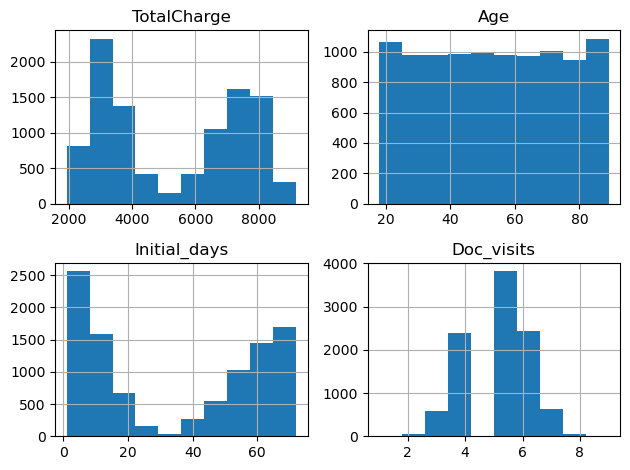

In [12]:
# Display univariate visualization

df3[['TotalCharge', 'Age', 'Initial_days', 'Doc_visits']].hist()
plt.tight_layout()


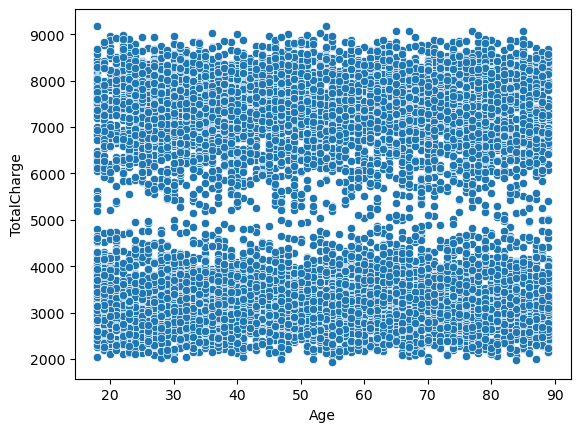

In [13]:
# Display bivariate visualization

sns.scatterplot(x=df3['Age'], y=df3['TotalCharge'])
plt.show()

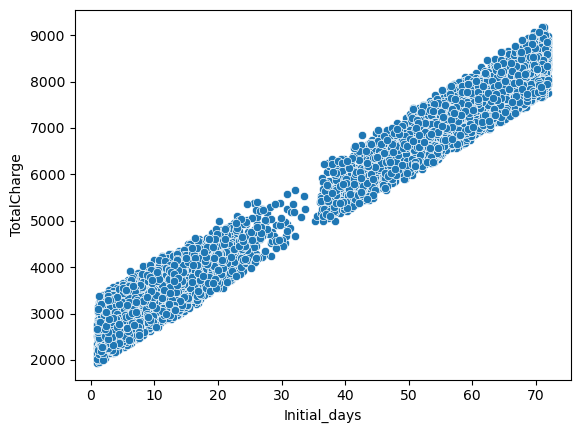

In [14]:
# Display bivariate visualization

sns.scatterplot(x=df3['Initial_days'], y=df3['TotalCharge'])
plt.show()

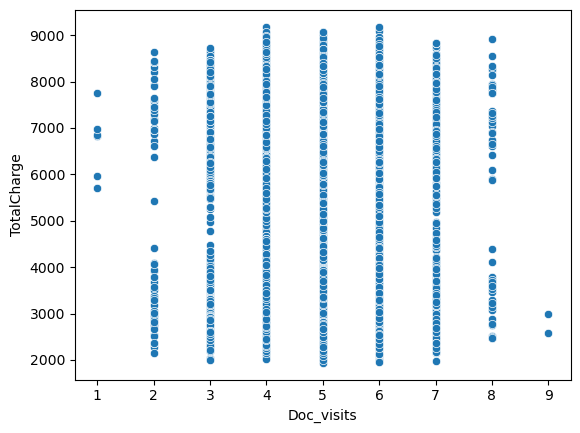

In [15]:
# Display bivariate visualization

sns.scatterplot(x=df3['Doc_visits'], y=df3['TotalCharge'])
plt.show()

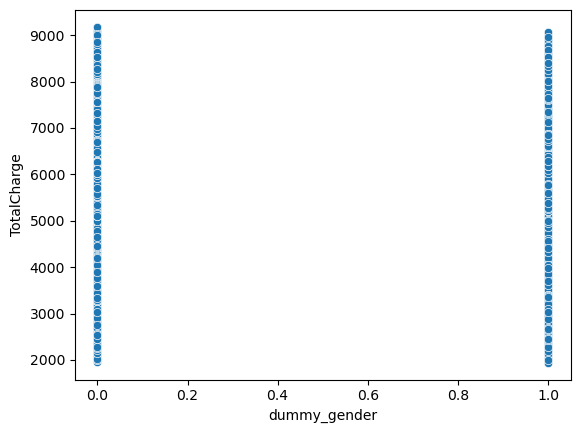

In [16]:
# Display bivariate visualization

sns.scatterplot(x=df3['dummy_gender'], y=df3['TotalCharge'])
plt.show()

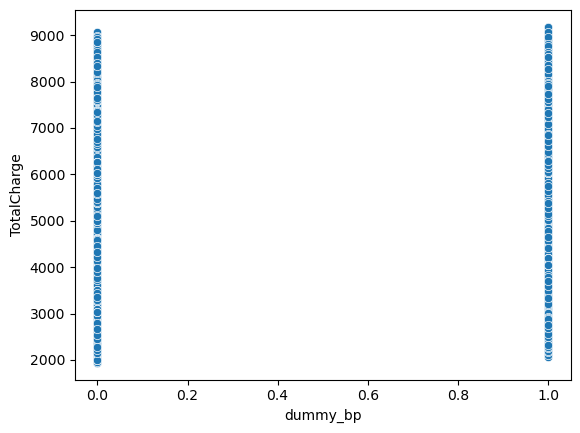

In [17]:
# Display bivariate visualization

sns.scatterplot(x=df3['dummy_bp'], y=df3['TotalCharge'])
plt.show()

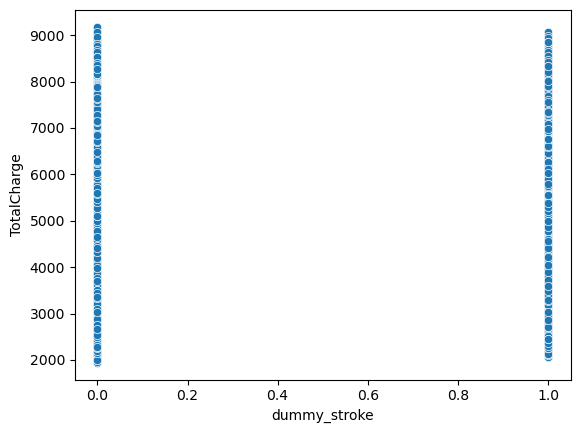

In [18]:
# Display bivariate visualization

sns.scatterplot(x=df3['dummy_stroke'], y=df3['TotalCharge'])
plt.show()


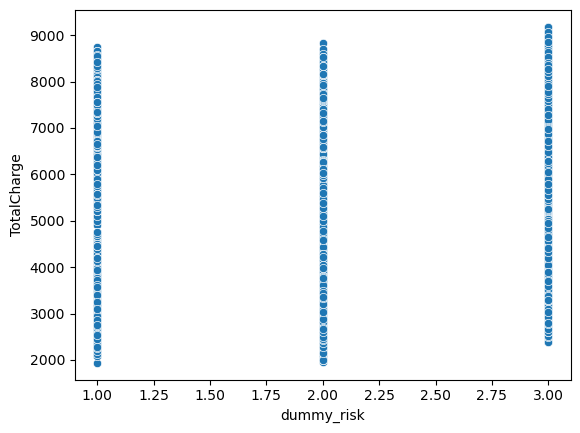

In [19]:
# Display bivariate visualization

sns.scatterplot(x=df3['dummy_risk'], y=df3['TotalCharge'])
plt.show()


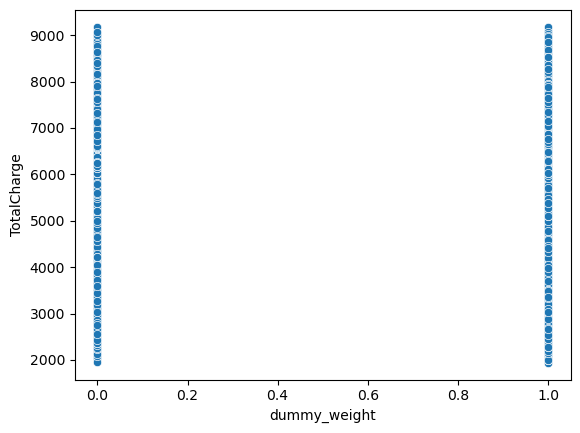

In [20]:
# Display bivariate visualization

sns.scatterplot(x=df3['dummy_weight'], y=df3['TotalCharge'])
plt.show()

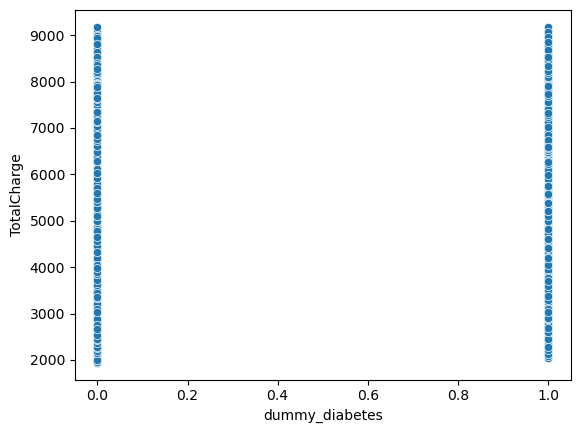

In [21]:
# Display bivariate visualization

sns.scatterplot(x=df3['dummy_diabetes'], y=df3['TotalCharge'])
plt.show()

### C5. Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

In [22]:
# Save and load the prepared data set

df3.to_csv('prepared_dataset.csv')

df = pd.read_csv('prepared_dataset.csv')

In [23]:
df.columns

Index(['Unnamed: 0', 'Age', 'Doc_visits', 'Initial_days', 'TotalCharge',
       'dummy_gender', 'dummy_bp', 'dummy_stroke', 'dummy_risk',
       'dummy_weight', 'dummy_diabetes'],
      dtype='object')

In [24]:
df.shape

(10000, 11)

# Part IV: Model Comparison and Analysis
## D. Compare an initial and a reduced multiple regression model by doing the following:

### D1. Construct an initial multiple regression model from all predictors that were identified in Part C2.

In [25]:
# Construct the multiple regression model

df['intercept'] = 1

initial_model = sm.OLS(df['TotalCharge'], df[['intercept', 'Age', 'Doc_visits', 'Initial_days', 'dummy_gender', 'dummy_bp', 'dummy_stroke', 'dummy_risk', 'dummy_weight', 'dummy_diabetes']])

results = initial_model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 6.066e+04
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:10:32   Log-Likelihood:                -70966.
No. Observations:               10000   AIC:                         1.420e+05
Df Residuals:                    9990   BIC:                         1.420e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       1954.1495     19.585     99.775      0.000    1915.758    1992.541
Age                0.0333      0.142      0.235      0.814      -0.245       0.311
Doc_visits         0.6402      2.797      0.229      0.819      -4.843       6.123
Initial_days      81.9547      0.111    737.075      0.000      81.737      82.173
dummy_gender      -8.5520      5.856     -1.460      0.144     -20.030       2.926
dummy_bp         109.6306      5.952     18.420      0.000      97.964     121.297
dummy_stroke     -11.1559      7.321     -1.524      0.128     -25.506       3.194
dummy_risk       225.5449      4.007     56.293      0.000     217.691     233.399
dummy_weight     -10.7825      6.444     -1.673      0.094     -23.413       1.848
dummy_diabetes    71.1001      6.559     10.840      0.000      58.243      83.957
==============================================================================
Omnibus:                    15020.577   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.822
Skew:                          -0.004   Prob(JB):                    2.87e-142
Kurtosis:                       1.749   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### D2. Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

<p>A heatmap will be created for a visual bivariate analysis.</p>

In [26]:
# Analyze the correlation of data via heatmap

med_bivariate = df[['TotalCharge', 'Age', 'Doc_visits', 'Initial_days', 'dummy_gender', 'dummy_bp', 'dummy_stroke', 'dummy_risk', 'dummy_weight', 'dummy_diabetes']]


In [27]:
med_bivariate.corr()[['TotalCharge']].sort_values(by='TotalCharge', ascending=False)

,TotalCharge
TotalCharge,1.000000
Initial_days,0.987640
dummy_risk,0.061834
dummy_bp,0.019910
Age,0.016876
dummy_diabetes,0.011524
dummy_gender,0.004748
dummy_stroke,-0.003694
Doc_visits,-0.005043
dummy_weight,-0.012782


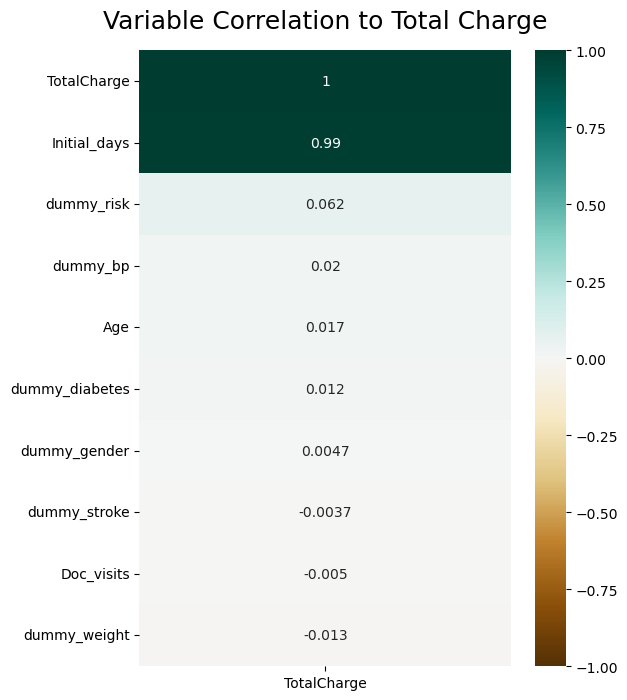

In [28]:
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(med_bivariate.corr()[['TotalCharge']].sort_values(by='TotalCharge', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variable Correlation to Total Charge', fontdict={'fontsize':18}, pad=16);



#### Justification

<p>The heatmap shows the relationship between TotalCharge and the other variables and allows a visual analysis of which are most significant.</p>

<p>Backward Stepwise Elimination will be used in variable selection.<br> The initial model shows variables with a p-value greater than 0.05, meaning they are not statistically significant.<br>
The Backward Stepwise Elimination process will remove all variables with a p-value greater than 0.05, ensuring the remaining variables are statistically significant and align with the research question.<br>
    
After removing the insignificant variables, Initial_Days, dummy_bp, dummy_risk, and dummy_diabetes remain.<br>
All remaining variables have a p-value of 0.000, meaning they are statistically significant and the selection procedure is complete.<br>
    
The remaining variables will be used in the reduced model.</p>

### D3. Provide a reduced multiple regression model that includes both categorical and continuous variables.
**Note: The output should include a screenshot of each model.**

<p>The 'Initial_days' column is the most significant predictor of variance at 0.99.
The reduced model will include the 'Initial_days' column as the continuous variable. The model will also include the 'dummy_risk', 'dummy_bp' and 'dummy_diabetes' columns as the categorical variables.</p>

In [29]:
# Construct the reduced regression model

df['intercept'] = 1

reduced_model = sm.OLS(df['TotalCharge'], df[['Initial_days', 'dummy_bp', 'dummy_risk', 'dummy_diabetes', 'intercept']])

results = reduced_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.365e+05
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:10:33   Log-Likelihood:                -70970.
No. Observations:               10000   AIC:                         1.419e+05
Df Residuals:                    9995   BIC:                         1.420e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Initial_days      81.9563      0.111    737.179      0.000      81.738      82.174
dummy_bp         109.2845      5.950     18.368      0.000      97.622     120.947
dummy_risk       225.5711      4.007     56.298      0.000     217.717     233.425
dummy_diabetes    71.1635      6.559     10.850      0.000      58.307      84.020
intercept       1945.2075     10.256    189.659      0.000    1925.103    1965.312
==============================================================================
Omnibus:                    15224.332   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.911
Skew:                          -0.005   Prob(JB):                    1.67e-142
Kurtosis:                       1.748   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The reduced model shows the R-squared value remains high at 0.982.

## E.  Analyze the data set using your reduced multiple regression model by doing the following:

### E1. Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:
<ul><li><b>the logic of the variable selection technique</b>
    <br>
    <p>The variable selection technique had the following logic:</p>
    <p>The initial model with dummy variables had an R-squared value of 0.982, meaning 98.2% of the variation could be explained by the variables. Any variables with a p-value of less than 0.05 were considered statistically significant. Variables with a p-value greater than 0.05 were removed before running the reduced model.</p><br>
    <li><b>the model evaluation metric:</b><br>
        <p>The initial model had an R-squared value of 0.982. The variables with a p-value less than 0.05 were used in the reduced model. The R-squared value remained at 0.982 after removing the variables with a p-value greater than 0.05, meaning 98.2% of the variation could still be explained by the remaining variables. The unchanged R-squared value shows the goodness of the fit remains the same.</p>
        <p>The initial model had an AIC of 1.420e+05 while the reduced model had a slightly lower AIC of 1.419e+05. The lower AIC would suggest the reduced model is a better fit.</p><br>
    </li>
    <li><b>a residual plot:</b></li></ul>

In [30]:
# Residual Plot

df = pd.read_csv('prepared_dataset.csv')
df['intercept'] = 1
residual_plot = df['TotalCharge'] - results.predict(df[['Initial_days', 'dummy_bp', 'dummy_weight', 'dummy_diabetes', 'intercept']])

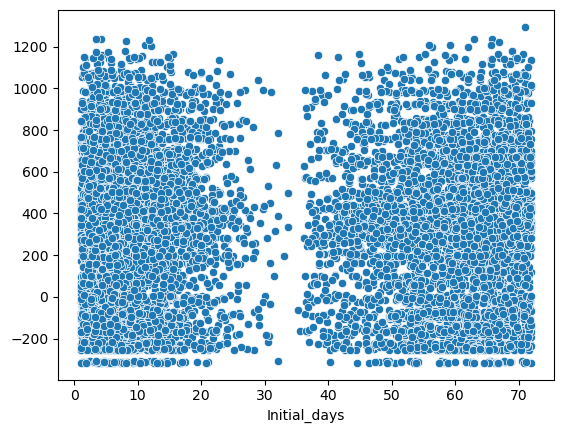

In [31]:
sns.scatterplot(x=df['Initial_days'], y=residual_plot)
plt.show()

### E2. Provide the output and any calculations of the analysis you performed, including the model’s residual error.
**Note: The output should include the predictions from the refined model you used to perform the analysis.** <br>
All output, calculations, and results provided in examples above.

In [32]:
# Print the Residual Error

rse = np.sqrt(results.mse_resid)
print("The Residual Error is: ", rse)

The Residual Error is:  292.4446401308204


### E3. Provide the code used to support the implementation of the multiple regression models.
<p>All code used in the multiple regression models provided above.</p>

# Part V: Data Summary and Implications
## F. Summarize your findings and assumptions by doing the following:
### F1. Discuss the results of your data analysis, including the following elements: 
<ul>
    <li><b>a regression equation for the reduced model.</b><br>
        TotalCharge = 1945.20 + (81.95 * Initial_days) + (109.28 * dummy_bp) + (225.57 * dummy_risk) + (71.16 * dummy_diabetes)</li><br>
    <li><b>an interpretation of coefficients of the statistically significant variables of the model.</b><br>
    The model shows that statistically significant variables in predicting the patients total charge are Initial_days, dummy_bp, dummy_risk, and dummy_diabetes.<br><br>
    The model predicts the following:<br>
    - A one unit increase in Initial_days will increase TotalCharge by 81.95 units.<br>
    - A one unit increase in dummy_bp will increase TotalCharge by 109.28 units.<br>
    - A one unit increase in dummy_risk will increase TotalCharge by 225.57 units.<br>
    - A one unit increase in dummy diabetes will increase TotalCharge by 71.16 units.</li><br>
    <li><b>the statistical and practical significance of the model.</b></li>
    <p>The reduced model is statistically significant. The variables are Initial_days, dummy_bp, dummy_risk, and dummy_diabetes and they all have a p-value of 0.00. The p-value of 0.00 means the variables are statistically significant and have an affect on the TotalCharge variable.</p><br>
    <p>The reduced model is practically significant. The model shows that the Initial_days, dummy_bp, dummy_risk, and dummy_diabetes variables have an affect on a patient's total charge. The model is useful in the real world because the organization can use it to predict which types of patient treatment generate the most revenue.</p>
    <br>
    <li> <b>the limitations of the data analysis.</b><br>
    The additional charges column was dropped from the dataset because it could also be affected by some of the predictor variables chosen.<br>
    Not including the additional charges column may have an influence on the results of the data analysis.</li>
</ul>

### F2. Recommend a course of action based on your results.

<p>The data analysis shows a relationship between a patient's total charge and the initial days, blood pressure, stroke risk, and diabetes categories.<br>
The stakeholders can use this information to predict which patients will bring in the most revenue and focus priorities on those patient groups.</p>

# Part VI: Demonstration
## G. Provide a Panopto video recording that includes all of the following elements:
<b><ul>
 <li>a demonstration of the functionality of the code used for the analysis.</li>
 <li>an identification of the version of the programming environment.</li>
 <li>a comparison of the two multiple regression models you used in your analysis.</li>
 <li>an interpretation of the coefficients.</li></ul></b>
 <p>Panapto video included in submission.</p>
 
 ## H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.
 
 <p>No third-party code used.</p>
 
 ## I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
 #### References:
 
 Statistics Solutions(n.d). <em>Assumptions of Multiple Linear Regression</em>. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/